In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from collections import Counter
from haversine import haversine

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV,cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,roc_auc_score,classification_report,plot_confusion_matrix

In [4]:
train_path ="../data/train_clear.csv"
test_path = "../data/test_clear.csv"

In [5]:
test = pd.read_csv(test_path)

In [6]:
train = pd.read_csv(train_path)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09 00:00:00,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:00,30.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21 00:00:00,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:00,40.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19 00:00:00,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:00,56.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12 00:00:00,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01 00:00:00,51.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28 00:00:00,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01 00:00:00,32.0


Feature eng.

In [7]:

coordenadas_proprietario = []
for lat,long in zip(train["lat"],train["long"]):
    coordenadas_proprietario.append((lat,long))

coordenadas_fraud= []
for lat,long in zip(train["merch_lat"],train["merch_long"]):
    coordenadas_fraud.append((lat,long))

dist_km = []
for vit,fraud in zip(coordenadas_proprietario,coordenadas_fraud):
    dist_km.append(round(haversine(vit,fraud),3))

train["dist_fraude_km"] = dist_km

In [8]:
coordenadas_proprietario = []
for lat,long in zip(test["lat"],test["long"]):
    coordenadas_proprietario.append((lat,long))

coordenadas_fraud= []
for lat,long in zip(test["merch_lat"],test["merch_long"]):
    coordenadas_fraud.append((lat,long))

dist_km = []
for vit,fraud in zip(coordenadas_proprietario,coordenadas_fraud):
    dist_km.append(round(haversine(vit,fraud),3))

test["dist_fraude_km"] = dist_km

In [9]:
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age,dist_fraude_km
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09 00:00:00,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:00,30.0,78.598
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21 00:00:00,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:00,40.0,30.212
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19 00:00:00,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:00,56.0,108.206
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12 00:00:00,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01 00:00:00,51.0,95.673
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28 00:00:00,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01 00:00:00,32.0,77.557


dropando colunas inutei para o modelo

In [47]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'dist_fraude_km'],
      dtype='object')

In [10]:
train_model_prep = train.drop(columns = ['trans_date_trans_time','city','lat','long','dob','merch_lat','merch_long','trans_date','state','street',"first","last","unix_time","merchant","cc_num","trans_num","zip","gender","job"])

In [49]:
train_model_prep.head()

,category,amt,city_pop,is_fraud,age,dist_fraude_km
0,misc_net,4.97,3495,0,30.0,78.598
1,grocery_pos,107.23,149,0,40.0,30.212
2,entertainment,220.11,4154,0,56.0,108.206
3,gas_transport,45.00,1939,0,51.0,95.673
4,misc_pos,41.96,99,0,32.0,77.557


In [50]:
train_model_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   category        1296675 non-null  object 
 1   amt             1296675 non-null  float64
 2   city_pop        1296675 non-null  int64  
 3   is_fraud        1296675 non-null  int64  
 4   age             1296675 non-null  float64
 5   dist_fraude_km  1296675 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 59.4+ MB


In [14]:
le_category = LabelEncoder()

In [15]:
le_category.fit(train_model_prep['category'])

LabelEncoder()

In [16]:
train_model_prep['category'] = le_category.transform(train_model_prep['category'])

In [17]:
train_model_prep.head()

,category,amt,city_pop,is_fraud,age,dist_fraude_km
0,8,4.97,3495,0,30.0,78.598
1,4,107.23,149,0,40.0,30.212
2,0,220.11,4154,0,56.0,108.206
3,2,45.00,1939,0,51.0,95.673
4,9,41.96,99,0,32.0,77.557


In [18]:
# for col in train_model_prep.columns:
#     if train_model_prep[col].dtypes == object:
#         train_model_prep[col]= le.fit_transform(train_model_prep[col])

In [19]:
train_model_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   category        1296675 non-null  int32  
 1   amt             1296675 non-null  float64
 2   city_pop        1296675 non-null  int64  
 3   is_fraud        1296675 non-null  int64  
 4   age             1296675 non-null  float64
 5   dist_fraude_km  1296675 non-null  float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 54.4 MB


In [20]:
train_model_prep

,category,amt,city_pop,is_fraud,age,dist_fraude_km
0,8,4.97,3495,0,30.0,78.598
1,4,107.23,149,0,40.0,30.212
2,0,220.11,4154,0,56.0,108.206
3,2,45.00,1939,0,51.0,95.673
4,9,41.96,99,0,32.0,77.557
...,...,...,...,...,...,...
1296670,0,15.56,258,0,58.0,119.752
1296671,1,51.70,100,0,40.0,75.104
1296672,1,105.93,899,0,52.0,99.048
1296673,1,74.90,1126,0,39.0,84.628


In [21]:
X = train_model_prep.drop(columns=["is_fraud"])
y = train_model_prep.is_fraud

In [22]:
print("Dimensões X = {} , y = {}".format(X.shape, y.shape))

Dimensões X = (1296675, 5) , y = (1296675,)


In [23]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 1289169, 1: 7506})


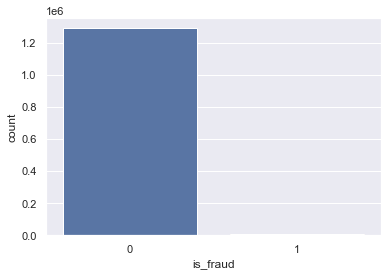

In [24]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="is_fraud", data=train_model_prep)

Balanceando as classes

In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
ros = RandomOverSampler(random_state=42)

In [27]:
X_res, y_res = ros.fit_resample(X, y)

In [28]:
print('Original dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 1289169, 1: 1289169})


Separando os dados em treino e validação

In [29]:
x_train,x_val,y_train,y_val = train_test_split(X_res,y_res,test_size=0.30,random_state=42)

In [30]:
print("Exibindo as dimensões dos nossos dados de treino: ")
print("X_train --> {}".format(x_train.shape))
print("y_train --> {}".format(y_train.shape))
print("X_val --> {}".format(x_val.shape))
print("y_val --> {}".format(y_val.shape))

Exibindo as dimensões dos nossos dados de treino: 
X_train --> (1804836, 5)
y_train --> (1804836,)
X_val --> (773502, 5)
y_val --> (773502,)


Nessa parte vamos fazer a escolha do nosso modelo, para isso instanciaremos diversos modeles treinaremos os mesmo, logo após isso vamos escolher os melhores baseado em suas metricas

importando os modelos

In [ ]:
!pip install xgboost

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from xgboost import XGBClassifier

In [32]:
dt = DecisionTreeClassifier()
rfclf = RandomForestClassifier()
ada = AdaBoostClassifier()
gbclf = GradientBoostingClassifier()
logit = LogisticRegression()
bernou = BernoulliNB()
gaunb = GaussianNB()
xgbclf = XGBClassifier()

In [33]:
models = [dt,rfclf,ada,gbclf,logit,bernou,gaunb,xgbclf]

In [34]:
def best_model(x,y,model_list:list,cv=3):
    print("-"*50)
    df_ret = []
    for m in model_list:
        recall=[]
        f1 = []
        acc = []
        precision = []
        print(m.__class__.__name__)
        for score in ["recall","f1","accuracy","precision"]:
            cvs = cross_val_score(m, x,y, scoring=score, cv=cv)
            mean = cvs.mean()
            std = cvs.std()
            print(score + " : "+ str(round(mean,3)) + " std : "+ str(round(std,3)))
            print("Intervalo :  [{:.2f}% ~ {:.2f}%]".format((mean - 2*std)*100, (mean + 2*std)*100))
            print()
            if score == "recall":
                recall.append(round(mean,3))
            elif score == "f1":
                f1.append(round(mean,3))
            elif score == "accuracy":
                acc.append(round(mean,3))
            else:
                precision.append(round(mean,3))

        df_ret.append(pd.DataFrame(data=zip(recall,f1,acc,precision), index=[m.__class__.__name__], columns=['recall','f1','accuracy','precision']))



        print()
    return pd.concat(df_ret,sort=True)

In [35]:
def fit_models(models_list:list, x,y):
    retorno = []
    print("[INFO]: Iniciando o treinamento dos modelos")
    print("[INFO]: Shape do treinamento X : {}".format(x.shape))
    print("[INFO]: Shape do treinamento y : {}".format(y.shape))
    print("-"*50)
    for model in models_list:
        print("[INFO]: modelo a ser treinado  ",model.__class__.__name__)
        model.fit(x,y)
        print("[INFO]:Treinamento do modelo conlcuido")
        print("-"*50)
        retorno.append(model)
    return retorno

In [73]:
df_model = best_model(x_train,y_train,models)

--------------------------------------------------
DecisionTreeClassifier
recall : 1.0 std : 0.0
Intervalo :  [100.00% ~ 100.00%]

f1 : 0.999 std : 0.0
Intervalo :  [99.84% ~ 99.86%]

accuracy : 0.999 std : 0.0
Intervalo :  [99.84% ~ 99.86%]

precision : 0.997 std : 0.0
Intervalo :  [99.68% ~ 99.71%]


RandomForestClassifier
recall : 1.0 std : 0.0
Intervalo :  [100.00% ~ 100.00%]

f1 : 0.999 std : 0.0
Intervalo :  [99.89% ~ 99.90%]

accuracy : 0.999 std : 0.0
Intervalo :  [99.89% ~ 99.90%]

precision : 0.998 std : 0.0
Intervalo :  [99.79% ~ 99.81%]


AdaBoostClassifier
recall : 0.896 std : 0.002
Intervalo :  [89.18% ~ 90.07%]

f1 : 0.91 std : 0.004
Intervalo :  [90.13% ~ 91.86%]

accuracy : 0.911 std : 0.004
Intervalo :  [90.24% ~ 92.03%]

precision : 0.924 std : 0.007
Intervalo :  [91.07% ~ 93.74%]


GradientBoostingClassifier
recall : 0.948 std : 0.001
Intervalo :  [94.66% ~ 94.87%]

f1 : 0.954 std : 0.001
Intervalo :  [95.27% ~ 95.51%]

accuracy : 0.954 std : 0.001
Intervalo :  [95.

# Avaliar os dados do df_model

In [74]:
df_model

,accuracy,f1,precision,recall
DecisionTreeClassifier,0.999,0.999,0.997,1.000
RandomForestClassifier,0.999,0.999,0.998,1.000
AdaBoostClassifier,0.911,0.910,0.924,0.896
GradientBoostingClassifier,0.954,0.954,0.960,0.948
LogisticRegression,0.842,0.827,0.910,0.759
BernoulliNB,0.521,0.669,0.511,0.969
GaussianNB,0.807,0.769,0.956,0.643
XGBClassifier,0.991,0.991,0.983,1.000


## Aqui vamos ordenar os dados de maneira decrescente  por duas colunas que são elas: precision, recall

In [76]:
df_model.sort_values(by=['precision','f1'],ascending=False)

,accuracy,f1,precision,recall
RandomForestClassifier,0.999,0.999,0.998,1.000
DecisionTreeClassifier,0.999,0.999,0.997,1.000
XGBClassifier,0.991,0.991,0.983,1.000
GradientBoostingClassifier,0.954,0.954,0.960,0.948
GaussianNB,0.807,0.769,0.956,0.643
AdaBoostClassifier,0.911,0.910,0.924,0.896
LogisticRegression,0.842,0.827,0.910,0.759
BernoulliNB,0.521,0.669,0.511,0.969


Percebemos que os moledos a serem escolhidos vão ser: RandomFlorestCLf, DecisionTreeClf, XGBClf

In [77]:
model_train = fit_models([rfclf],x_train,y_train)

[INFO]: Iniciando o treinamento dos modelos
[INFO]: Shape do treinamento X : (1804836, 5)
[INFO]: Shape do treinamento y : (1804836,)
--------------------------------------------------
[INFO]: modelo a ser treinado   RandomForestClassifier
[INFO]:Treinamento do modelo conlcuido
--------------------------------------------------


In [78]:
df_model_train = best_model(x_val,y_val,model_train)

--------------------------------------------------
RandomForestClassifier
recall : 1.0 std : 0.0
Intervalo :  [100.00% ~ 100.00%]

f1 : 0.998 std : 0.0
Intervalo :  [99.83% ~ 99.85%]

accuracy : 0.998 std : 0.0
Intervalo :  [99.82% ~ 99.85%]

precision : 0.997 std : 0.0
Intervalo :  [99.66% ~ 99.70%]




In [79]:
df_model_train.sort_values(by=['precision','recall'],ascending=False)

,accuracy,f1,precision,recall
RandomForestClassifier,0.998,0.998,0.997,1.0


Aqui vemos indicação de que o melhor foi o randomflorest

In [80]:
model_train

[RandomForestClassifier()]

In [81]:
model = model_train[0]
model

RandomForestClassifier()

Identificando as features de maiores importancia no modelo

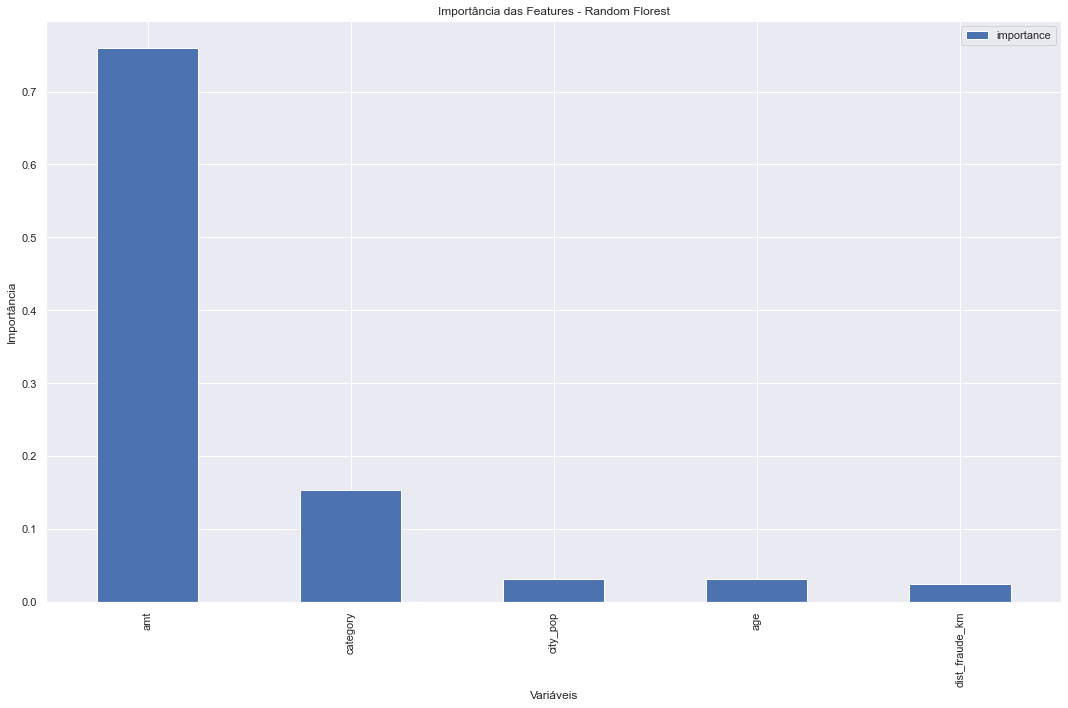

In [83]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - Random Florest")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")


plt.tight_layout()

Tunando os hyperparametros

In [36]:
param = {
    'bootstrap': [True, False],
    'max_depth': [50, 70, 90, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 4,8],
    'min_samples_split': [ 5, 10,15],
    'n_estimators': [100,300,600,900]
}

In [37]:
gridRF = GridSearchCV(estimator=RandomForestClassifier(bootstrap=True, max_depth=90,max_features="sqrt",min_samples_leaf=2,min_samples_split=10,n_estimators=600), param_grid={"class_weight":["balanced", "balanced_subsample"]},cv=3,scoring="f1",verbose=3)
gridRF.fit(x_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


KeyboardInterrupt: 

In [41]:
#gridRF = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param,cv=3,scoring="precision",verbose=3)
#gridRF.fit(x_train,y_train)

In [ ]:
# params = {
#     "bootstrap":False,
#     "max_depth":100,
#     "max_features":"auto",
#     "min_samples_leaf":2,
#     "min_samples_split":10,
#     "n_estimators":2000
# }

# Rodar o modelo a partir daqui

In [120]:
param_final={
    "bootstrap": True,
    'max_depth':  90,
    'max_features': 'sqrt',
    "min_samples_leaf":2,
    "min_samples_split":8,
    "n_estimators":200
}

In [121]:
model_final = RandomForestClassifier()

In [122]:
model_final.set_params(**param_final)

RandomForestClassifier(max_depth=90, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=8, n_estimators=200)

In [123]:
l_model = fit_models([model_final],x_train,y_train)

[INFO]: Iniciando o treinamento dos modelos
[INFO]: Shape do treinamento X : (1804836, 5)
[INFO]: Shape do treinamento y : (1804836,)
--------------------------------------------------
[INFO]: modelo a ser treinado   RandomForestClassifier
[INFO]:Treinamento do modelo conlcuido
--------------------------------------------------


In [124]:
l_model

[RandomForestClassifier(max_depth=90, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=8, n_estimators=200)]

In [125]:
model = l_model[0]

In [126]:
model

RandomForestClassifier(max_depth=90, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=8, n_estimators=200)

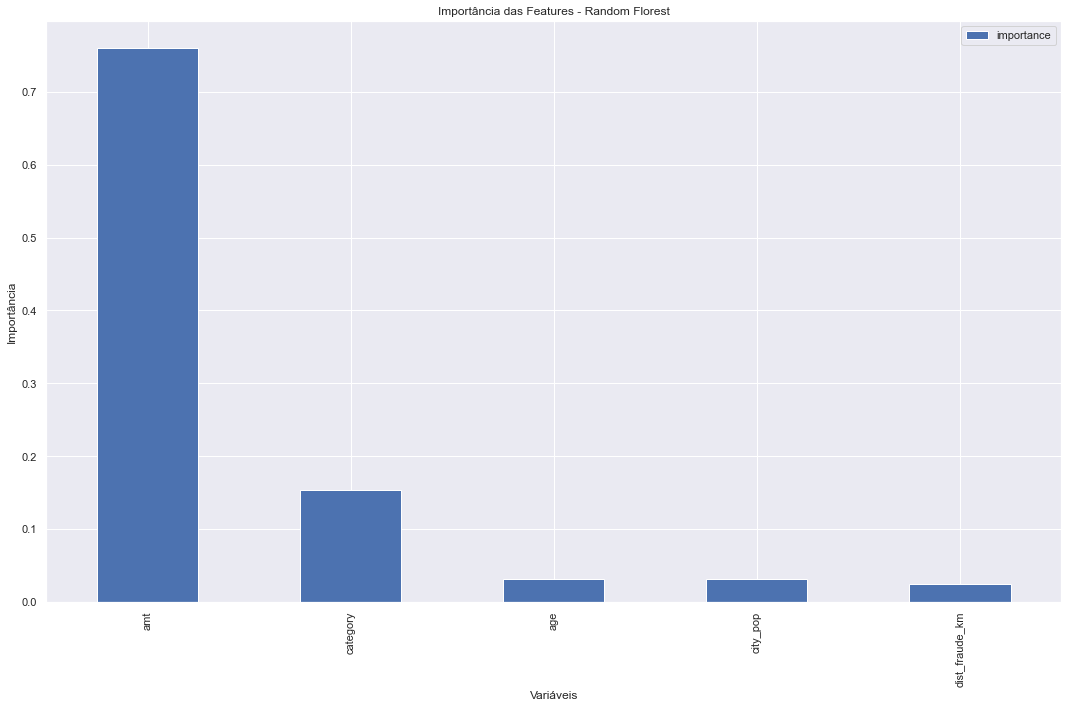

In [127]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - Random Florest")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")


plt.tight_layout()

## Avaliando o melhor modelo:

Testes

In [128]:

test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age,dist_fraude_km
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,Mechanical engineer,1968-03-19 00:00:00,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21 00:00:00,52.0,24.561
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,"Sales professional, IT",1990-01-17 00:00:00,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21 00:00:00,30.0,104.925
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,"Librarian, public",1970-10-21 00:00:00,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21 00:00:00,49.0,59.080
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,Set designer,1987-07-25 00:00:00,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21 00:00:00,32.0,27.699
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,Furniture designer,1955-07-06 00:00:00,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21 00:00:00,64.0,104.335


In [129]:
test_model_prep = test.drop(columns = ['trans_date_trans_time','city','lat','long','dob','merch_lat','merch_long','trans_date','state','street',"first","last","unix_time","merchant","cc_num","trans_num","zip","gender","job"])

In [130]:
# for col in test_model_prep.columns:
#     if test_model_prep[col].dtypes == object:
#         test_model_prep[col]= le.fit_transform(test_model_prep[col])

In [131]:
test_model_prep.head()

,category,amt,city_pop,is_fraud,age,dist_fraude_km
0,personal_care,2.86,333497,0,52.0,24.561
1,personal_care,29.84,302,0,30.0,104.925
2,health_fitness,41.28,34496,0,49.0,59.080
3,misc_pos,60.05,54767,0,32.0,27.699
4,travel,3.19,1126,0,64.0,104.335


In [132]:
y_test_true = test_model_prep.is_fraud

In [133]:
x_test = test_model_prep.drop(columns=["is_fraud"])

In [134]:
x_test

,category,amt,city_pop,age,dist_fraude_km
0,personal_care,2.86,333497,52.0,24.561
1,personal_care,29.84,302,30.0,104.925
2,health_fitness,41.28,34496,49.0,59.080
3,misc_pos,60.05,54767,32.0,27.699
4,travel,3.19,1126,64.0,104.335
...,...,...,...,...,...
555714,health_fitness,43.77,519,54.0,77.026
555715,kids_pets,111.84,28739,21.0,100.075
555716,kids_pets,86.88,3684,39.0,80.759
555717,travel,7.99,129,55.0,52.933


In [165]:
x_test['category'] = le_category.transform( x_test['category'])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [144]:
pred_val = model.predict(x_val)

In [145]:
pred_test = model.predict(x_test)

  Accuracy:

validation:

In [146]:
accuracy_score(y_val,pred_val)

0.9990846823925471

test data

In [147]:
accuracy_score(y_test_true,pred_test)

0.9972342136943311

F1

val data

In [148]:
f1_score(y_val,pred_val)

0.9990865034759318

test data

In [149]:
f1_score(y_test_true,pred_test)

0.6768972041202439

Recall

val data

In [150]:
recall_score(y_val,pred_val)

1.0

test data

In [151]:
recall_score(y_test_true,pred_test)

0.7505827505827506

ROC

val data

In [152]:
roc_auc_score(y_val,pred_val)

0.9990836944198543

test data

In [153]:
roc_auc_score(y_test_true,pred_test)

0.8743863472373121

val_data

In [154]:
precision_score(y_val,pred_val)

0.9981746743804721

test data

In [155]:
precision_score(y_test_true,pred_test)

0.6163859111791731

Classification report

In [156]:
test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age,dist_fraude_km
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,Mechanical engineer,1968-03-19 00:00:00,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21 00:00:00,52.0,24.561
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,"Sales professional, IT",1990-01-17 00:00:00,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21 00:00:00,30.0,104.925
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,"Librarian, public",1970-10-21 00:00:00,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21 00:00:00,49.0,59.080
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,Set designer,1987-07-25 00:00:00,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21 00:00:00,32.0,27.699
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,Furniture designer,1955-07-06 00:00:00,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21 00:00:00,64.0,104.335


In [157]:
target_names = ["não fraude", "fraude"]

In [158]:
print("Dados de Validação")
print(classification_report(y_val, pred_val, target_names=target_names))

Dados de Validação
              precision    recall  f1-score   support

  não fraude       1.00      1.00      1.00    386334
      fraude       1.00      1.00      1.00    387168

    accuracy                           1.00    773502
   macro avg       1.00      1.00      1.00    773502
weighted avg       1.00      1.00      1.00    773502



In [159]:
print("Dados de teste")
print(classification_report(y_test_true, pred_test, target_names=target_names))

Dados de teste
              precision    recall  f1-score   support

  não fraude       1.00      1.00      1.00    553574
      fraude       0.62      0.75      0.68      2145

    accuracy                           1.00    555719
   macro avg       0.81      0.87      0.84    555719
weighted avg       1.00      1.00      1.00    555719



In [160]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

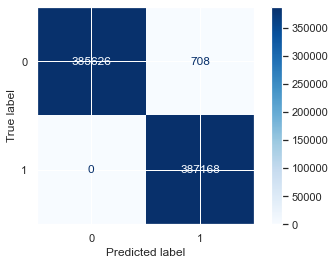

In [161]:
cm = confusion_matrix(y_val, pred_val, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.from_predictions(y_val, pred_val,display_labels=model.classes_, cmap="Blues")
plt.show()

plot matriz de confusão test data

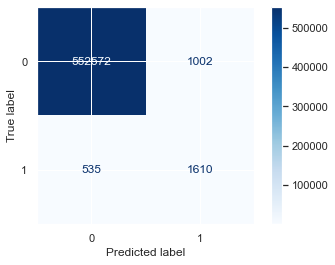

In [162]:
cm = confusion_matrix(y_test_true, pred_test, labels=model.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.from_predictions(y_test_true, pred_test,display_labels=model.classes_, cmap="Blues")
plt.show()

Serialização

In [163]:
# salvar modelo
import pickle
# salvar o modelo Random florest  no arquivo model_randFlorest.pkl
with open('model_randFlorest.pkl', 'wb') as file:
    pickle.dump(model, file)

## Salvando o encoder

In [32]:
import pickle
with open('./model_randFlorest.pkl', 'rb') as arq:
    model_pkl = pickle.load(arq)

In [172]:
le = LabelEncoder()

In [173]:
train_model_prep

,category,amt,gender,city_pop,job,is_fraud,age
0,misc_net,4.97,F,3495,"Psychologist, counselling",0,30.0
1,grocery_pos,107.23,F,149,Special educational needs teacher,0,40.0
2,entertainment,220.11,M,4154,Nature conservation officer,0,56.0
3,gas_transport,45.00,M,1939,Patent attorney,0,51.0
4,misc_pos,41.96,M,99,Dance movement psychotherapist,0,32.0
...,...,...,...,...,...,...,...
770705,food_dining,3.06,F,1675,Barrister,0,33.0
770706,home,9.49,F,1606,Ecologist,0,53.0
770707,entertainment,78.76,M,1442,Air broker,0,37.0
770708,travel,506.00,M,1446,Chartered loss adjuster,0,41.0


In [174]:
for col in test_model_prep.columns:
    if train_model_prep[col].dtypes == object:
        le.fit(train_model_prep[col])

In [175]:
train_model_prep

,category,amt,gender,city_pop,job,is_fraud,age
0,misc_net,4.97,F,3495,"Psychologist, counselling",0,30.0
1,grocery_pos,107.23,F,149,Special educational needs teacher,0,40.0
2,entertainment,220.11,M,4154,Nature conservation officer,0,56.0
3,gas_transport,45.00,M,1939,Patent attorney,0,51.0
4,misc_pos,41.96,M,99,Dance movement psychotherapist,0,32.0
...,...,...,...,...,...,...,...
770705,food_dining,3.06,F,1675,Barrister,0,33.0
770706,home,9.49,F,1606,Ecologist,0,53.0
770707,entertainment,78.76,M,1442,Air broker,0,37.0
770708,travel,506.00,M,1446,Chartered loss adjuster,0,41.0


In [75]:
# salvar o salvando o label encoder  no arquivo encoder.pkl
with open('encoder.pkl', 'wb') as file:
    pickle.dump(le_category, file)

Sample para api

In [230]:
a=test_model_prep[test_model_prep["is_fraud"]==1].sample(n=1)

In [229]:
b = test_model_prep[test_model_prep["is_fraud"]==0].sample(n=1)

In [231]:
a

,category,amt,city_pop,is_fraud,age,dist_fraude_km
403273,misc_net,836.44,1804,1,46.0,65.082


In [232]:
b

,category,amt,city_pop,is_fraud,age,dist_fraude_km
510692,kids_pets,34.48,5848,0,39.0,85.25
